### faculty hiring from phd institutions
- data from https://www.science.org/doi/10.1126/sciadv.1400005#
- Systematic inequality and hierarchy in faculty hiring networks

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.autonotebook import tqdm
from postdocsalary.paths import DATA_DIR, ensure_dir
import urllib.request
pd.set_option('display.max_columns', None)

<ipython-input-2-1570110eca21>:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
Business_edgelist = pd.read_csv(DATA_DIR/ 'faculty_hiring'/ 'Business_edgelist.txt', sep='\t')
Business_vertexlist = pd.read_csv(DATA_DIR/ 'faculty_hiring'/ 'Business_vertexlist.txt', sep='\t')
ComputerScience_edgelist = pd.read_csv(DATA_DIR/ 'faculty_hiring'/ 'ComputerScience_edgelist.txt', sep='\t')
ComputerScience_vertexlist = pd.read_csv(DATA_DIR/ 'faculty_hiring'/ 'ComputerScience_vertexlist.txt', sep='\t')
History_edgelist = pd.read_csv(DATA_DIR/ 'faculty_hiring'/ 'History_edgelist.txt', sep='\t')
History_vertexlist = pd.read_csv(DATA_DIR/ 'faculty_hiring'/ 'History_vertexlist.txt', sep='\t')

In [4]:
ComputerScience_edgelist[:3]

,# u,v,rank,gender
0,1,1,Asst,M
1,1,1,Assoc,M
2,1,1,Assoc,M


In [5]:
ComputerScience_vertexlist[:3]

,# u,pi,USN2010,NRC95,Region,institution
0,1,2.23,1,1,West,Stanford University
1,2,2.31,1,3,West,UC Berkeley
2,3,3.52,1,2,Northeast,MIT


In [6]:
ComputerScience_vertexlist[-3:]

,# u,pi,USN2010,NRC95,Region,institution
203,204,186.81,127,92,South,"University of Alabama, Tuscaloosa"
204,205,186.84,127,82,South,"University of North Texas, Denton"
205,206,206.00,.,.,Earth,All others


In [7]:
ComputerScience_vertexlist["# u"].values

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [8]:
hiring_count_df = pd.DataFrame(columns = ['institution', 'n_hires'])
for vertex in ComputerScience_vertexlist["# u"].values:
    hiring_count_df.loc[len(hiring_count_df)] = [vertex, np.sum(ComputerScience_edgelist ["# u"].values == vertex)]
                                                

In [9]:
hiring_count_df

,institution,n_hires
0,1,189
1,2,204
2,3,299
3,4,40
4,5,68
...,...,...
201,202,0
202,203,0
203,204,2
204,205,0


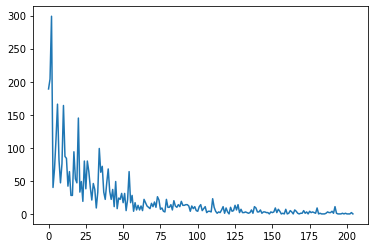

In [10]:
plt.plot(hiring_count_df.n_hires.values[:-1])

In [34]:
ComputerScience_edgelist_gender = ComputerScience_edgelist.merge(ComputerScience_vertexlist, on = "# u")[["institution", "gender"]]
ComputerScience_edgelist_gender["gender"] = ComputerScience_edgelist_gender["gender"] == "M"
ComputerScience_edgelist_gender[:3]

,institution,gender
0,Stanford University,True
1,Stanford University,True
2,Stanford University,True


In [44]:
ComputerScience_edgelist_n = ComputerScience_edgelist_gender.institution.value_counts()[:50].index
ComputerScience_edgelist_n

Index(['All others', 'MIT', 'UC Berkeley', 'Stanford University',
       'Carnegie Mellon University',
       'University of Illinois, Urbana Champaign', 'University of Toronto',
       'Cornell University', 'Purdue University',
       'University of Texas, Austin', 'University of Wisconsin, Madison',
       'University of Pennsylvania', 'Princeton University',
       'University of Maryland, College Park',
       'University of Massachusetts, Amherst', 'University of Washington',
       'Georgia Tech', 'Harvard University', 'Ohio State University', 'UCLA',
       'University of Waterloo', 'University of Michigan',
       'University of Minnesota, Minneapolis', 'Brown University',
       'University of Southern California', 'University of British Columbia',
       'Pennsylvania State University', 'Columbia University',
       'Yale University', 'State University of New York, Stony Brook',
       'Rice University', 'California Institute of Technology',
       'University of North Caroli

In [46]:
ComputerScience_edgelist_gender_dist = (
    ComputerScience_edgelist_gender.groupby(by="institution")
    .mean()
    .sort_values(by="gender")
)
ComputerScience_edgelist_gender_dist = ComputerScience_edgelist_gender_dist[
    ComputerScience_edgelist_gender_dist.index.isin(ComputerScience_edgelist_n)
]
ComputerScience_edgelist_gender_dist

,gender
institution,
Indiana University,0.695652
Syracuse University,0.750000
Rutgers University,0.757576
North Carolina State University,0.769231
University of Pennsylvania,0.773810
UCLA,0.781250
UC Irvine,0.783784
Columbia University,0.787234
Purdue University,0.797980


In [47]:
Business_edgelist_gender = Business_edgelist.merge(Business_vertexlist, on = "# u")[["institution", "gender"]]
Business_edgelist_gender["gender"] = Business_edgelist_gender["gender"] == "M"
Business_edgelist_gender[:3]

,institution,gender
0,Stanford University,True
1,Stanford University,True
2,Stanford University,True


In [48]:
Business_edgelist_n = Business_edgelist_gender.institution.value_counts()[:50].index
Business_edgelist_n

Index(['All others', 'Stanford University', 'MIT', 'Harvard University',
       'University of Michigan', 'University of Pennsylvania',
       'University of Chicago', 'Northwestern University', 'UC Berkeley',
       'New York University', 'University of Texas, Austin',
       'University of Illinois, Urbana Champaign', 'Columbia University',
       'Ohio State University', 'Indiana University', 'Cornell University',
       'University of Minnesota, Minneapolis', 'Michigan State University',
       'Purdue University', 'University of North Carolina, Chapel Hill',
       'University of Wisconsin, Madison', 'Carnegie Mellon University',
       'Pennsylvania State University', 'UCLA', 'Texas A&M', 'Yale University',
       'University of Florida', 'University of Rochester', 'Duke University',
       'University of Iowa', 'University of Maryland, College Park',
       'University of Georgia', 'University of Pittsburgh',
       'University of Southern California', 'Arizona State University'

In [49]:
Business_edgelist_gender_dist = (
    Business_edgelist_gender.groupby(by="institution")
    .mean()
    .sort_values(by="gender")
)
Business_edgelist_gender_dist = Business_edgelist_gender_dist[
    Business_edgelist_gender_dist.index.isin(Business_edgelist_n)
]
Business_edgelist_gender_dist

,gender
institution,
Boston University,0.589286
University of Southern California,0.640449
"University of North Carolina, Chapel Hill",0.648485
"University of Maryland, College Park",0.660000
University of Cincinnati,0.666667
"University of Colorado, Boulder",0.679245
Virginia Tech,0.700000
Duke University,0.701754
Columbia University,0.708108
